## Overview of the dataset
Here I will load the trial summary tables that include codes associated with Subjects and Activities

Subjects are grouped as follows

    SA: Adults subjects between 19 and 30 years old
    SE: Elderly people between 60 and 75 years old
    
Activities are grouped as follows

    F: Falls
    A: Activities of daily life (ADL)
    
First, let's get the summaries of that data.

In [1]:
import pandas as pd
import os

def load_summary_as_df(fname):
    df = pd.read_csv(fname, sep='|', skipinitialspace=True)
    df.columns = df.columns.str.strip()
    for col in df.columns:
        if df[col].dtype.kind not in 'biufc':
            df[col] = df[col].str.strip()
    df.sort_values('ID')
    return df

subjects = load_summary_as_df("Subjects.txt")
activity = load_summary_as_df("Activities.txt")

In [2]:
subjects

,ID,Age,Height,Weight,Gender
0,SA01,26,165,53.0,F
1,SA02,23,176,58.5,M
2,SA03,19,156,48.0,F
3,SA04,23,170,72.0,M
4,SA05,22,172,69.5,M
5,SA06,21,169,58.0,M
6,SA07,21,156,63.0,F
7,SA08,21,149,41.5,F
8,SA09,24,165,64.0,M
9,SA10,21,177,67.0,M


In [3]:
activity

,ID,Activity,Trials,Duration
0,D01,Walking slowly,1,100s
1,D02,Walking quickly,1,100s
2,D03,Jogging slowly,1,100s
3,D04,Jogging quickly,1,100s
4,D05,Walking upstairs and downstairs slowly,5,25s
5,D06,Walking upstairs and downstairs quickly,5,25s
6,D07,"Slowly sit in a half height chair, wait a mome...",5,12s
7,D08,"Quickly sit in a half height chair, wait a mom...",5,12s
8,D09,"Slowly sit in a low height chair, wait a momen...",5,12s
9,D10,"Quickly sit in a low height chair, wait a mome...",5,12s


Previously, I labeled the t-series datasets and saved them as pickles, so now I will reload them all available combinations of subjects and activities.

In [11]:
import glob
import numpy as np
import matplotlib.pyplot as plt

types = ['F', 'D']
trial_dict = { 'F': {}, 'D': {} }

for _type in types:
    for _s in subjects.ID:
    #     for _a in activity.ID:
        for _a in activity[activity['ID'].str.contains(_type)]['ID']:
            dpath = os.path.abspath(_s)
            fpath = os.path.join(dpath,_a)
            files = glob.glob("%s*.pkl" % fpath)
            if len(files) > 0:
                trial_dict[_type][_s,_a] = []
                for _f in files:
                    _t = os.path.split(_f)[-1].split('_')[-1].split('.')[0]
                    trial_dict[_type][_s,_a].append(_t)
                trial_dict[_type][_s,_a].sort()
    #         print(_s, _a, "has", len(trial_dict[_s,_a]), "trials")
    total = 0
    for key in trial_dict[_type]:
        total += len(trial_dict[_type][key])

    print(_type)
    print("%8i unique subject-activity cases" % len(trial_dict[_type]))
    print("%8i unique trials" % total)

F
     360 unique subject-activity cases
    1798 unique trials
D
     623 unique subject-activity cases
    2512 unique trials


Using `trial_dict` I can then count the total number of trials and access specific lists of trials for a given `trial_dict` key that is the pair of subject and activity IDs.

F
360 entries
1798 trials
0 entries without trials


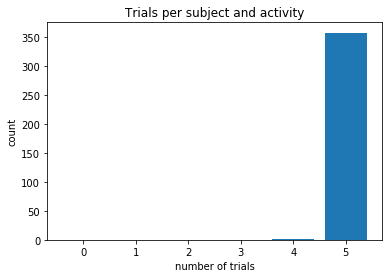

D
623 entries
2512 trials
0 entries without trials


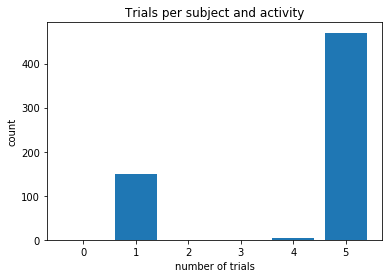

In [13]:
for _type in types:
    print(_type)
    total = 0
    notrial = 0
    n_trials = [[], []]
    for key in trial_dict[_type].keys():
        _nt = len(trial_dict[_type][key])
        total += _nt
        n_trials[0].append(_nt)
        if n_trials == 0:
            notrial += 1
    print(len(trial_dict[_type].keys()), "entries")
    print(total, "trials")
    print(notrial, "entries without trials")

    n_trials = np.array(n_trials)
    plt.hist(n_trials[0], bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5], 
             rwidth = 0.8, align='mid')
    plt.title("Trials per subject and activity")
    plt.xlabel("number of trials")
    plt.ylabel("count")
    plt.show()

We need a consistent way to get the filepath, so here's a function for that:

In [14]:
def fpath(sub,act,trial, ext='pkl'):
    _fn = "%s_%s_%s.%s" % (act,sub,trial,ext)
    _fp = os.path.abspath(sub)
    _fp = os.path.join(_fp,_fn)
    print(_fp)
    return _fp

def age_of_subject(subject_id):
    return int(subjects[subjects.ID == subject_id].Age)

def activity_str(activity_id):
    return activity.loc[activity.ID == activity_id]['Activity'].values[0]

Let's now go through and extract the data and the features just for the pitch, yaw, and roll.

In [17]:
data_set = {}
for _type in types:
    data_set[_type] = []
    for SubAct in trial_dict[_type]:
        for trial in trial_dict[_type][SubAct]:
            df = pd.read_pickle(fpath(SubAct[0],SubAct[1],trial))
            data_set[_type].append(df)

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA01/F01_SA01_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA01/F01_SA01_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA01/F01_SA01_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA01/F01_SA01_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA01/F01_SA01_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA01/F02_SA01_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA01/F02_SA01_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA01/F02_SA01_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA01/F02_SA01_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA01/F02_SA01_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA01/F03_SA01_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA02/F14_SA02_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA02/F15_SA02_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA02/F15_SA02_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA02/F15_SA02_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA02/F15_SA02_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA02/F15_SA02_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA03/F01_SA03_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA03/F01_SA03_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA03/F01_SA03_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA03/F01_SA03_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA03/F01_SA03_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA04/F15_SA04_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA04/F15_SA04_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA04/F15_SA04_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA05/F01_SA05_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA05/F01_SA05_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA05/F01_SA05_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA05/F01_SA05_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA05/F01_SA05_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA05/F02_SA05_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA05/F02_SA05_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA05/F02_SA05_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA06/F15_SA06_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA06/F15_SA06_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA06/F15_SA06_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA06/F15_SA06_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA07/F01_SA07_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA07/F01_SA07_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA07/F01_SA07_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA07/F01_SA07_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA07/F01_SA07_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA07/F02_SA07_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA07/F02_SA07_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA09/F01_SA09_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA09/F01_SA09_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA09/F01_SA09_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA09/F02_SA09_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA09/F02_SA09_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA09/F02_SA09_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA09/F02_SA09_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA09/F02_SA09_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA09/F03_SA09_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA09/F03_SA09_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA09/F03_SA09_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA10/F15_SA10_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA10/F15_SA10_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA10/F15_SA10_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA10/F15_SA10_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA10/F15_SA10_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA11/F01_SA11_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA11/F01_SA11_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA11/F01_SA11_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA11/F01_SA11_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA11/F01_SA11_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA11/F02_SA11_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA12/F14_SA12_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA12/F15_SA12_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA12/F15_SA12_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA12/F15_SA12_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA12/F15_SA12_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA12/F15_SA12_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA13/F01_SA13_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA13/F01_SA13_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA13/F01_SA13_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA13/F01_SA13_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA13/F01_SA13_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA14/F13_SA14_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA14/F13_SA14_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA14/F13_SA14_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA14/F13_SA14_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA14/F14_SA14_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA14/F14_SA14_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA14/F14_SA14_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA14/F14_SA14_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA14/F14_SA14_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA14/F15_SA14_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA14/F15_SA14_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA16/F10_SA16_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA16/F10_SA16_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA16/F10_SA16_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA16/F11_SA16_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA16/F11_SA16_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA16/F11_SA16_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA16/F11_SA16_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA16/F11_SA16_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA16/F12_SA16_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA16/F12_SA16_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA16/F12_SA16_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA18/F12_SA18_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA18/F12_SA18_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA18/F12_SA18_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA18/F12_SA18_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA18/F13_SA18_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA18/F13_SA18_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA18/F13_SA18_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA18/F13_SA18_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA18/F13_SA18_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA18/F14_SA18_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA18/F14_SA18_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA20/F12_SA20_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA20/F12_SA20_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA20/F13_SA20_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA20/F13_SA20_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA20/F13_SA20_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA20/F13_SA20_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA20/F13_SA20_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA20/F14_SA20_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA20/F14_SA20_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA20/F14_SA20_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA20/F14_SA20_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA22/F13_SA22_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA22/F13_SA22_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA22/F13_SA22_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA22/F13_SA22_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA22/F13_SA22_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA22/F14_SA22_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA22/F14_SA22_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA22/F14_SA22_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA22/F14_SA22_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA22/F14_SA22_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA22/F15_SA22_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE06/F12_SE06_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE06/F12_SE06_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE06/F12_SE06_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE06/F13_SE06_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE06/F13_SE06_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE06/F13_SE06_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE06/F13_SE06_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE06/F13_SE06_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE06/F14_SE06_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE06/F14_SE06_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE06/F14_SE06_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA02/D13_SA02_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA02/D15_SA02_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA02/D15_SA02_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA02/D15_SA02_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA02/D15_SA02_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA02/D15_SA02_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA02/D16_SA02_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA02/D16_SA02_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA02/D16_SA02_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA02/D16_SA02_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA02/D16_SA02_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA04/D15_SA04_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA04/D15_SA04_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA04/D15_SA04_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA04/D15_SA04_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA04/D16_SA04_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA04/D16_SA04_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA04/D16_SA04_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA04/D16_SA04_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA04/D16_SA04_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA04/D17_SA04_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA04/D17_SA04_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA06/D13_SA06_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA06/D15_SA06_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA06/D15_SA06_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA06/D15_SA06_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA06/D15_SA06_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA06/D15_SA06_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA06/D16_SA06_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA06/D16_SA06_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA06/D16_SA06_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA06/D16_SA06_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA06/D16_SA06_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA08/D13_SA08_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA08/D13_SA08_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA08/D15_SA08_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA08/D15_SA08_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA08/D15_SA08_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA08/D15_SA08_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA08/D15_SA08_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA08/D16_SA08_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA08/D16_SA08_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA08/D16_SA08_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA08/D16_SA08_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA10/D13_SA10_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA10/D13_SA10_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA10/D13_SA10_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA10/D15_SA10_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA10/D15_SA10_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA10/D15_SA10_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA10/D15_SA10_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA10/D15_SA10_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA10/D16_SA10_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA10/D16_SA10_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA10/D16_SA10_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA12/D12_SA12_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA12/D12_SA12_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA12/D12_SA12_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA12/D13_SA12_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA12/D13_SA12_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA12/D13_SA12_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA12/D13_SA12_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA12/D13_SA12_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA12/D15_SA12_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA12/D15_SA12_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA12/D15_SA12_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA14/D11_SA14_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA14/D11_SA14_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA14/D11_SA14_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA14/D11_SA14_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA14/D11_SA14_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA14/D12_SA14_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA14/D12_SA14_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA14/D12_SA14_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA14/D12_SA14_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA14/D12_SA14_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA14/D13_SA14_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA16/D10_SA16_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA16/D10_SA16_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA16/D10_SA16_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA16/D11_SA16_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA16/D11_SA16_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA16/D11_SA16_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA16/D11_SA16_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA16/D11_SA16_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA16/D12_SA16_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA16/D12_SA16_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA16/D12_SA16_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA18/D08_SA18_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA18/D09_SA18_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA18/D09_SA18_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA18/D09_SA18_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA18/D09_SA18_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA18/D09_SA18_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA18/D10_SA18_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA18/D10_SA18_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA18/D10_SA18_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA18/D10_SA18_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA18/D10_SA18_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA20/D09_SA20_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA20/D09_SA20_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA20/D09_SA20_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA20/D10_SA20_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA20/D10_SA20_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA20/D10_SA20_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA20/D10_SA20_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA20/D10_SA20_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA20/D11_SA20_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA20/D11_SA20_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA20/D11_SA20_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA22/D09_SA22_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA22/D09_SA22_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA22/D09_SA22_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA22/D10_SA22_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA22/D10_SA22_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA22/D10_SA22_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA22/D10_SA22_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA22/D10_SA22_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA22/D11_SA22_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA22/D11_SA22_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SA22/D11_SA22_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE01/D08_SE01_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE01/D08_SE01_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE01/D08_SE01_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE01/D08_SE01_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE01/D09_SE01_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE01/D09_SE01_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE01/D09_SE01_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE01/D09_SE01_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE01/D09_SE01_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE01/D10_SE01_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE01/D10_SE01_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE04/D05_SE04_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE04/D05_SE04_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE04/D05_SE04_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE04/D05_SE04_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE04/D05_SE04_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE04/D07_SE04_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE04/D07_SE04_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE04/D07_SE04_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE04/D07_SE04_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE04/D07_SE04_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE04/D08_SE04_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE06/D12_SE06_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE06/D12_SE06_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE06/D12_SE06_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE06/D12_SE06_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE06/D13_SE06_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE06/D13_SE06_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE06/D13_SE06_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE06/D13_SE06_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE06/D13_SE06_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE06/D15_SE06_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE06/D15_SE06_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE09/D10_SE09_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE09/D10_SE09_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE09/D10_SE09_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE09/D10_SE09_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE09/D10_SE09_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE09/D11_SE09_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE09/D11_SE09_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE09/D11_SE09_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE09/D11_SE09_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE09/D11_SE09_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE09/D12_SE09_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE12/D05_SE12_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE12/D05_SE12_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE12/D05_SE12_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE12/D05_SE12_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE12/D05_SE12_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE12/D07_SE12_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE12/D07_SE12_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE12/D07_SE12_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE12/D07_SE12_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE12/D07_SE12_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE12/D08_SE12_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE14/D17_SE14_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE14/D17_SE14_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE14/D17_SE14_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE14/D17_SE14_R04.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE14/D17_SE14_R05.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE15/D01_SE15_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE15/D02_SE15_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE15/D03_SE15_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE15/D05_SE15_R01.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE15/D05_SE15_R02.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFall_labeled/SE15/D05_SE15_R03.pkl
/home/apatch/Documents/Insight/wobblewatch/data/SisFal

In [18]:
def df2array(df, label=0):
    return df[df['label'] == label].values[:,:6]

def maxbylabel(df, labels = [0,1,2]):
    for label in labels:
        df[df['label'] == label].values[:,:6]
    return

In [23]:
data_set.keys()

dict_keys(['F', 'D'])

In [26]:
for key in data_set:
    print(key,len(data_set[key]))

F 1798
D 2512


In [40]:
len(data_set['F'][1])

3000

In [48]:
d = {}

for _type in types:
    print(_type)
    d[_type] = {}
    for label in [0,1,2]:
        _list = []
        print(label)
        for _ds in data_set[_type]:
            _list.extend(list(df2array(_ds, label=label)))
        d[_type][label] = np.array(_list)

    nonfall = len(d[_type][0])
    prefall = len(d[_type][1])
    falling = len(d[_type][2])
    total_frames = nonfall + prefall + falling
    print("  Total Entries =  %5.3e" % total_frames)
    print("      Ratios")
    print("       Non-Fall = %5.3f" % (float(nonfall)/total_frames))
    print("       Pre-Fall = %5.3f" % (float(prefall)/total_frames))
    print("        Falling = %5.3f" % (float(falling)/total_frames))

F
0
1
2
  Total Entries =  5.394e+06
      Ratios
       Non-Fall = 0.932
       Pre-Fall = 0.041
        Falling = 0.027
D
0
1
2
  Total Entries =  9.984e+06
      Ratios
       Non-Fall = 0.984
       Pre-Fall = 0.016
        Falling = 0.000


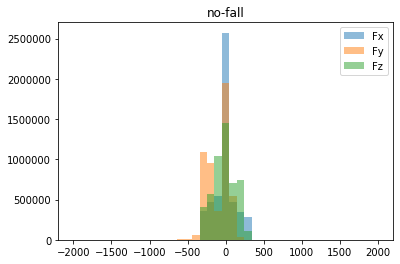

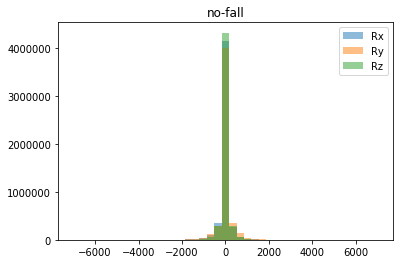

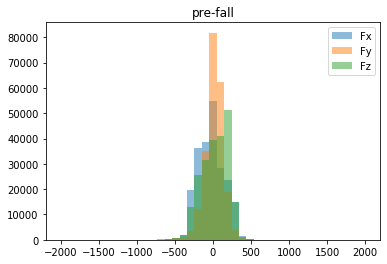

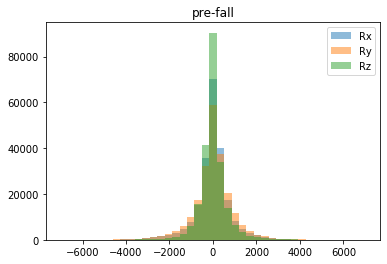

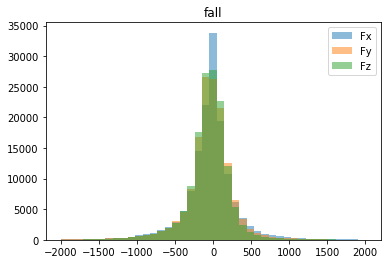

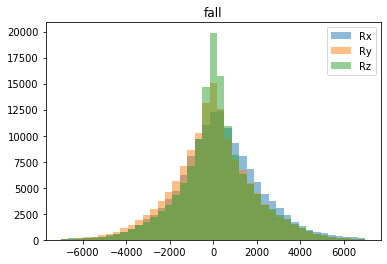

In [69]:
cols = ['Fx','Fy','Fz', 'Rx', 'Ry', 'Rz']
actg = ['no-fall', 'pre-fall', 'fall']

for label in [0,1,2]:
    plt.title(actg[label])
    for i in range(3):
        plt.hist(d['F'][label][:,i], bins=41, range=[-2000,2000], 
                 alpha=0.5, label=cols[i])
    plt.legend()
    plt.show()

    plt.title(actg[label])
    for i in range(3,6):
        plt.hist(d['F'][label][:,i], bins=41, range=[-7000,7000], 
                 alpha=0.5, label=cols[i])
    plt.legend()
    plt.show()

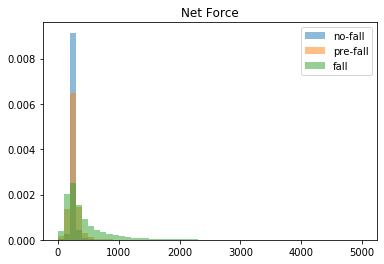

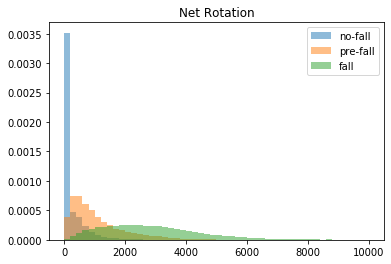

In [74]:
cols = ['Fx','Fy','Fz', 'Rx', 'Ry', 'Rz']
actg = ['no-fall', 'pre-fall', 'fall']


plt.title("Net Force")
for label in [0,1,2]:
    net_F = np.sqrt(d['F'][label][:,0]**2 + d['F'][label][:,1]**2 + d['F'][label][:,2]**2)
    plt.hist(net_F, bins=50, range=[0,5000], alpha=0.5, label=actg[label], density=True)
plt.legend()
plt.show()

plt.title("Net Rotation")
for label in [0,1,2]:
    net_T = np.sqrt(d['F'][label][:,3]**2 + d['F'][label][:,4]**2 + d['F'][label][:,5]**2)
    plt.hist(net_T, bins=50, range=[0,10000], alpha=0.5, label=actg[label], density=True)
plt.legend()
plt.show()

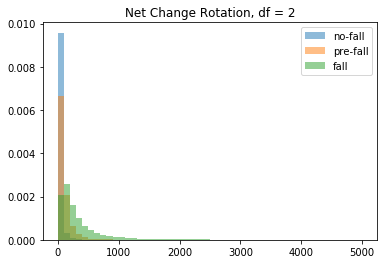

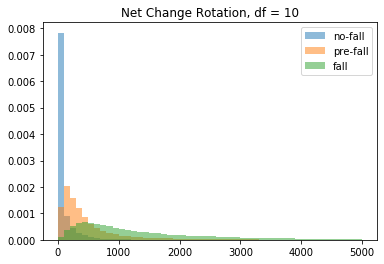

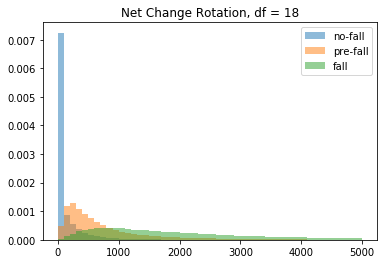

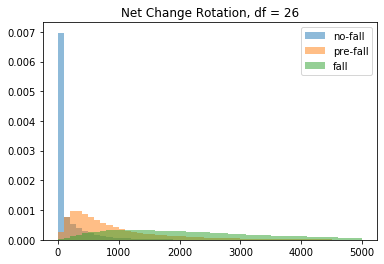

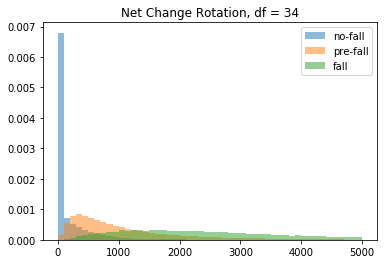

In [94]:
for i in range(1,20,4):
    plt.title("Net Change Rotation, df = %i" % (2*i))
    for label in [0,1,2]:
        delta_net_T = np.sqrt(  (d['F'][label][:,3][i:] - d['F'][label][:,3][:-i])**2 
                              + (d['F'][label][:,4][i:] - d['F'][label][:,4][:-i])**2 
                              + (d['F'][label][:,5][i:] - d['F'][label][:,5][:-i])**2)
        plt.hist(delta_net_T, bins=50, range=[0,5000], alpha=0.5, label=actg[label], density=True)
    plt.legend()
    plt.show()

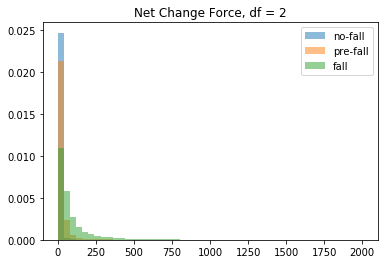

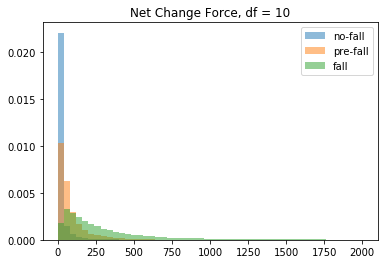

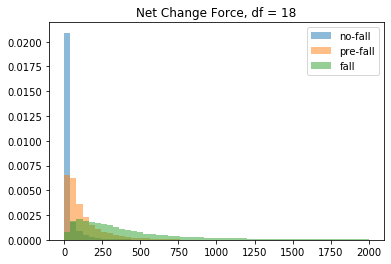

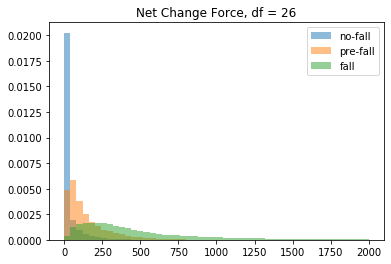

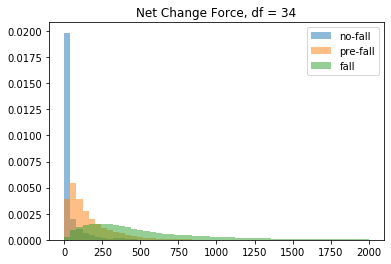

In [96]:
for i in range(1,20,4):
    plt.title("Net Change Force, df = %i" % (2*i))
    for label in [0,1,2]:
        delta_net_F = np.sqrt(  (d['F'][label][:,0][i:] - d['F'][label][:,0][:-i])**2 
                              + (d['F'][label][:,1][i:] - d['F'][label][:,1][:-i])**2 
                              + (d['F'][label][:,2][i:] - d['F'][label][:,2][:-i])**2)
        plt.hist(delta_net_F, bins=50, range=[0,2000], alpha=0.5, label=actg[label], density=True)
    plt.legend()
    plt.show()

df =  20


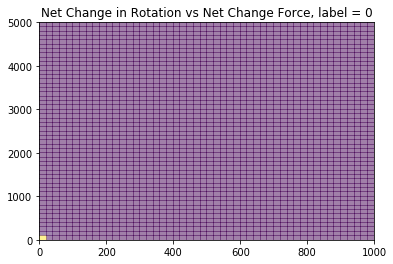

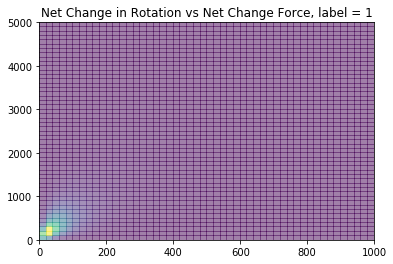

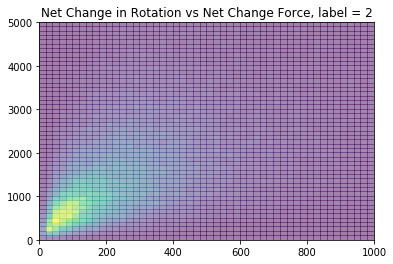

df =  40


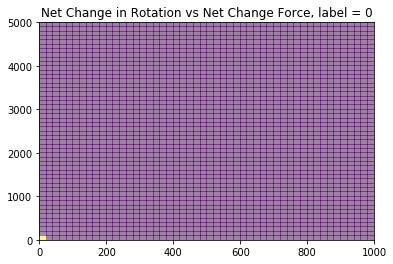

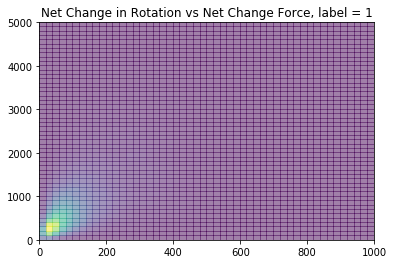

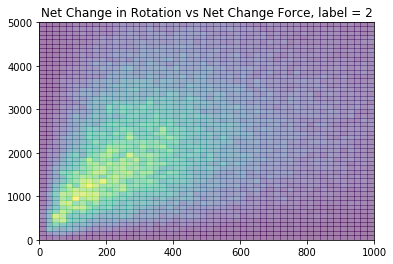

df =  60


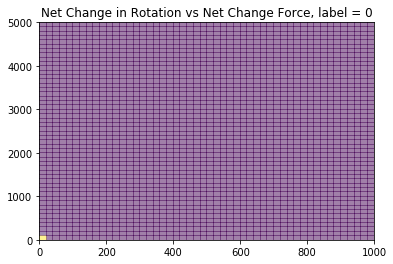

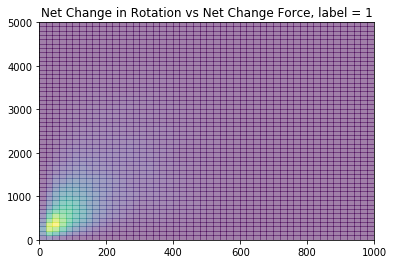

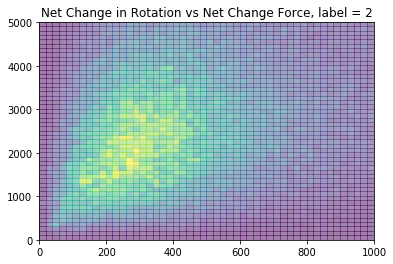

df =  80


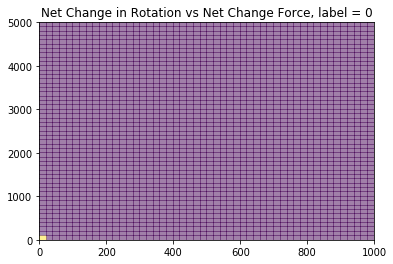

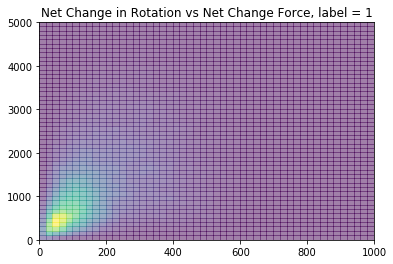

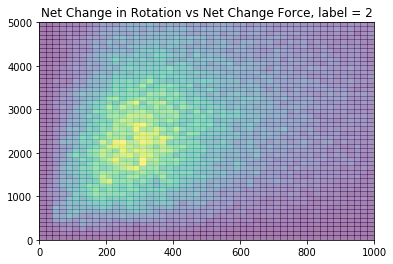

In [105]:
for i in range(10,50,10):
    print("df = ", i*2)
    for label in [0,1,2]:
        plt.title("Net Change in Rotation vs Net Change Force, label = %i" % (label))

        delta_net_F = np.sqrt(  (d['F'][label][:,0][i:] - d['F'][label][:,0][:-i])**2 
                              + (d['F'][label][:,1][i:] - d['F'][label][:,1][:-i])**2 
                              + (d['F'][label][:,2][i:] - d['F'][label][:,2][:-i])**2)
        
        delta_net_T = np.sqrt(  (d['F'][label][:,3][i:] - d['F'][label][:,3][:-i])**2 
                              + (d['F'][label][:,4][i:] - d['F'][label][:,4][:-i])**2 
                              + (d['F'][label][:,5][i:] - d['F'][label][:,5][:-i])**2)

        plt.hist2d(delta_net_F, delta_net_T, bins=50, range=[[0,1000], [0,5000]], alpha=0.5, density=True)
        plt.show()

In [109]:
i = 40
net_delta = {'F': {}, 'T': {}}

for label in [0,1,2]:
    net_delta['F'][label] = np.sqrt((d['F'][label][:,0][i:] - d['F'][label][:,0][:-i])**2 
                                  + (d['F'][label][:,1][i:] - d['F'][label][:,1][:-i])**2 
                                  + (d['F'][label][:,2][i:] - d['F'][label][:,2][:-i])**2)

    net_delta['T'][label] = np.sqrt((d['F'][label][:,3][i:] - d['F'][label][:,3][:-i])**2 
                                  + (d['F'][label][:,4][i:] - d['F'][label][:,4][:-i])**2 
                                  + (d['F'][label][:,5][i:] - d['F'][label][:,5][:-i])**2)

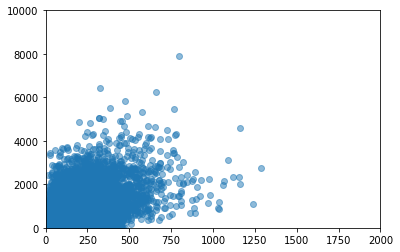

In [220]:
nth = 100
plt.xlim([0,2000])
plt.ylim([0,10000])
plt.scatter(net_delta['F'][0][::nth],net_delta['T'][0][::nth], alpha=0.5)

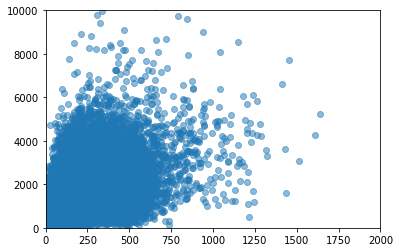

In [219]:
nth = 10
plt.xlim([0,2000])
plt.ylim([0,10000])
plt.scatter(net_delta['F'][1][::nth],net_delta['T'][1][::nth], alpha=0.5)

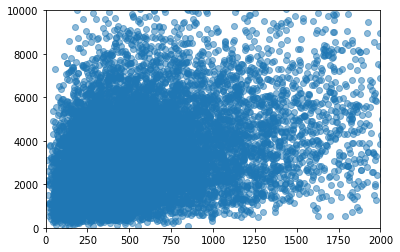

In [218]:
nth = 10
plt.xlim([0,2000])
plt.ylim([0,10000])
plt.scatter(net_delta['F'][2][::nth],net_delta['T'][2][::nth], alpha=0.5)

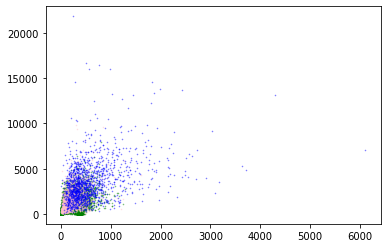

In [204]:
nth = 100
cdict = {0: 'green', 1: 'pink', 2: 'blue'}
for label in [0,1,2]:
    plt.scatter(net_delta['F'][label][::nth],net_delta['T'][label][::nth], c=cdict[label], alpha=0.5, s=0.3)

In [188]:
X, y = [], []
for label in [0,1,2]:
    _X, _y = ( np.stack((net_delta['F'][label], net_delta['T'][label]), axis=1), 
               np.full_like(net_delta['F'][label], label, dtype=int) )
    if len(X) == 0 and len(y) == 0:
        X, y = _X, _y
    else:
        X = np.append(X,_X, axis=0)
        y = np.append(y,_y, axis=0)

In [189]:
X.shape, y.shape

((5393594, 2), (5393594,))

In [193]:
type(y[::10])
cdict = {0: 'green', 1: 'pink', 2: 'orange'}
type(cdict)

dict

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()